Import Data

In [67]:
import pandas as pd

train = pd.read_csv("Datasets Training.csv")
test = pd.read_csv("Datasets Testing.csv")


print(train.shape)
print(test.shape)

(108, 105)
(24, 105)


Preprocessing

In [68]:
# Select X & y
# Data Train
X_train = train.iloc[0:,:-1] # Features
y_train = train.iloc[0:,-1] # Class Target
print(y_train.head())
# Data Test
X_test = test.iloc[0:,:-1] # Features
y_test = test.iloc[0:,-1] # Class Target
print(y_test.head())

0    Positif
1    Positif
2    Positif
3    Positif
4    Positif
Name: Class, dtype: object
0    Positif
1    Positif
2    Positif
3    Positif
4    Positif
Name: Class, dtype: object


In [69]:
# Normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler_train = sc.fit(X_train)
X_train_scaled = scaler_train.transform(X_train)

scaler_test = sc.fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

# Encode nilai class ke dalam bentuk numeric 0 - n_classes-1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train_preprocessed = le.transform(y_train)
y_test_preprocessed = le.transform(y_test)

print(y_train_preprocessed)
print(y_test_preprocessed)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


Features Selection - BPSO


                          Iteration - 1


Number of agents: 50

------------- Best Agent ---------------
Fitness: 0.9221153846153847
Number of Features: 42
----------------------------------------

Particle 1 - Fitness: 0.9221153846153847, Number of Features: 42
Particle 2 - Fitness: 0.8865384615384615, Number of Features: 40
Particle 3 - Fitness: 0.8836538461538461, Number of Features: 43
Particle 4 - Fitness: 0.8432692307692308, Number of Features: 46
Particle 5 - Fitness: 0.8403846153846154, Number of Features: 49
Particle 6 - Fitness: 0.8163461538461538, Number of Features: 35
Particle 7 - Fitness: 0.8125, Number of Features: 39
Particle 8 - Fitness: 0.8105769230769231, Number of Features: 41
Particle 9 - Fitness: 0.8086538461538462, Number of Features: 43
Particle 10 - Fitness: 0.8067307692307693, Number of Features: 45
Particle 11 - Fitness: 0.8067307692307693, Number of Features: 45
Particle 12 - Fitness: 0.8057692307692308, Number of Features: 46
Particle 13 - Fitness: 0.80480

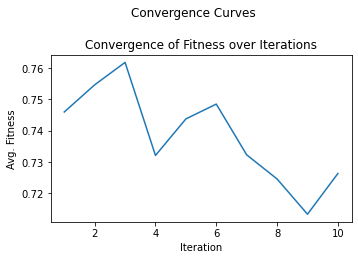

In [70]:
from _selection.pso import PSO

solution = PSO(num_agents = 50, 
               max_iter = 10,
               train_data = X_train_scaled, 
               test_data = X_test_scaled, 
               train_label = y_train_preprocessed, 
               test_label = y_test_preprocessed)

In [71]:
selected = solution.best_agent # result of selected features
selected

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0.])

In [72]:
import numpy as np
cols = np.flatnonzero(selected) 
cols

array([  4,   5,   9,  12,  17,  19,  22,  29,  31,  32,  33,  36,  41,
        42,  44,  49,  51,  55,  59,  62,  65,  66,  69,  71,  80,  81,
        85,  87,  89,  94,  97,  99, 101], dtype=int64)

In [73]:
df_X_train = X_train.iloc[:, cols]
df_X_train

,FOS_StandardDeviation,FOS_Skewness,FOS_MinimalGrayLevel,FOS_10Percentile,FOS_Smoothness,GLCM_Contrast_Mean,GLCM_InverseDifferenceMoment_Mean,GLCM_Information1_Mean,GLCM_MaximalCorrelationCoefficient_Mean,GLCM_ASM_0,...,GLCM_Information1_90,GLCM_SumVariance_135,GLCM_SumEntropy_135,GLCM_Information1_135,GLCM_MaximalCorrelationCoefficient_135,GLDS_Contrast,GLRLM_LongRunEmphasis,GLRLM_RunPercentage,GLRLM_HighGrayLevelRunEmphasis,GLRLM_ShortRunHighGrayLevelEmphasis
0,36.907932,-0.019692,35.0,75.0,0.999266,31.548630,0.305379,-0.425054,4.765945,0.000884,...,-0.438094,5373.536766,8.143898,-0.392062,4.915329,8438410.00,1.528425,1.767051,18007.570852,16454.362923
1,32.542691,-0.817625,55.0,94.0,0.999057,7.344386,0.451290,-0.526726,3.680515,0.002237,...,-0.542633,4202.972675,7.823438,-0.494903,3.936951,3288817.25,2.162285,2.039416,22911.883477,19303.384861
2,23.357994,-0.307463,64.0,107.0,0.998170,4.015827,0.526265,-0.547310,2.807729,0.003555,...,-0.573405,2165.855749,7.274176,-0.514040,2.997054,1289595.25,2.702398,1.594280,18946.276289,14815.892919
3,17.411838,0.278203,69.0,112.0,0.996712,22.176335,0.420425,-0.429181,3.328574,0.002551,...,-0.456763,1171.831121,7.125628,-0.393694,3.254970,5503906.75,1.983461,1.560264,18261.466958,15744.970262
4,14.841482,-0.720419,39.0,79.0,0.995481,6.081901,0.409834,-0.437824,2.961042,0.002941,...,-0.470260,868.056416,6.850491,-0.404722,3.163737,2054320.00,1.822641,1.861185,9601.064571,8260.297032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,26.164034,-0.718300,31.0,85.0,0.998541,11.545048,0.364050,-0.446694,3.399388,0.001499,...,-0.469634,2711.158392,7.575120,-0.425338,3.485794,1757699.50,1.683005,1.288205,14583.151522,12786.480826
104,22.078365,-1.204614,13.0,61.0,0.997953,16.262780,0.338939,-0.387647,3.538294,0.001989,...,-0.401900,1918.787896,7.230770,-0.376167,3.557361,1100896.25,1.621166,0.873330,9201.525182,8188.270321
105,32.723311,0.432474,0.0,31.0,0.999067,11.824606,0.442977,-0.521842,2.844242,0.001630,...,-0.527951,4223.550403,7.956082,-0.501978,2.988632,645684.25,2.175824,0.718523,5966.608210,5088.980273
106,23.929409,-0.658349,13.0,51.0,0.998257,5.945639,0.423932,-0.503592,2.828151,0.001944,...,-0.528326,2273.120117,7.499109,-0.465798,3.054357,2478726.25,1.894899,2.043305,7838.649240,6711.232801


In [74]:
df_train_selected = pd.concat([df_X_train, y_train], axis = 1)
df_train_selected 

,FOS_StandardDeviation,FOS_Skewness,FOS_MinimalGrayLevel,FOS_10Percentile,FOS_Smoothness,GLCM_Contrast_Mean,GLCM_InverseDifferenceMoment_Mean,GLCM_Information1_Mean,GLCM_MaximalCorrelationCoefficient_Mean,GLCM_ASM_0,...,GLCM_SumVariance_135,GLCM_SumEntropy_135,GLCM_Information1_135,GLCM_MaximalCorrelationCoefficient_135,GLDS_Contrast,GLRLM_LongRunEmphasis,GLRLM_RunPercentage,GLRLM_HighGrayLevelRunEmphasis,GLRLM_ShortRunHighGrayLevelEmphasis,Class
0,36.907932,-0.019692,35.0,75.0,0.999266,31.548630,0.305379,-0.425054,4.765945,0.000884,...,5373.536766,8.143898,-0.392062,4.915329,8438410.00,1.528425,1.767051,18007.570852,16454.362923,Positif
1,32.542691,-0.817625,55.0,94.0,0.999057,7.344386,0.451290,-0.526726,3.680515,0.002237,...,4202.972675,7.823438,-0.494903,3.936951,3288817.25,2.162285,2.039416,22911.883477,19303.384861,Positif
2,23.357994,-0.307463,64.0,107.0,0.998170,4.015827,0.526265,-0.547310,2.807729,0.003555,...,2165.855749,7.274176,-0.514040,2.997054,1289595.25,2.702398,1.594280,18946.276289,14815.892919,Positif
3,17.411838,0.278203,69.0,112.0,0.996712,22.176335,0.420425,-0.429181,3.328574,0.002551,...,1171.831121,7.125628,-0.393694,3.254970,5503906.75,1.983461,1.560264,18261.466958,15744.970262,Positif
4,14.841482,-0.720419,39.0,79.0,0.995481,6.081901,0.409834,-0.437824,2.961042,0.002941,...,868.056416,6.850491,-0.404722,3.163737,2054320.00,1.822641,1.861185,9601.064571,8260.297032,Positif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,26.164034,-0.718300,31.0,85.0,0.998541,11.545048,0.364050,-0.446694,3.399388,0.001499,...,2711.158392,7.575120,-0.425338,3.485794,1757699.50,1.683005,1.288205,14583.151522,12786.480826,Negatif
104,22.078365,-1.204614,13.0,61.0,0.997953,16.262780,0.338939,-0.387647,3.538294,0.001989,...,1918.787896,7.230770,-0.376167,3.557361,1100896.25,1.621166,0.873330,9201.525182,8188.270321,Negatif
105,32.723311,0.432474,0.0,31.0,0.999067,11.824606,0.442977,-0.521842,2.844242,0.001630,...,4223.550403,7.956082,-0.501978,2.988632,645684.25,2.175824,0.718523,5966.608210,5088.980273,Negatif
106,23.929409,-0.658349,13.0,51.0,0.998257,5.945639,0.423932,-0.503592,2.828151,0.001944,...,2273.120117,7.499109,-0.465798,3.054357,2478726.25,1.894899,2.043305,7838.649240,6711.232801,Negatif


In [75]:
df_X_test = X_test.iloc[:, cols]
df_X_test

,FOS_StandardDeviation,FOS_Skewness,FOS_MinimalGrayLevel,FOS_10Percentile,FOS_Smoothness,GLCM_Contrast_Mean,GLCM_InverseDifferenceMoment_Mean,GLCM_Information1_Mean,GLCM_MaximalCorrelationCoefficient_Mean,GLCM_ASM_0,...,GLCM_Information1_90,GLCM_SumVariance_135,GLCM_SumEntropy_135,GLCM_Information1_135,GLCM_MaximalCorrelationCoefficient_135,GLDS_Contrast,GLRLM_LongRunEmphasis,GLRLM_RunPercentage,GLRLM_HighGrayLevelRunEmphasis,GLRLM_ShortRunHighGrayLevelEmphasis
0,16.795148,0.152268,72.0,104.0,0.996467,3.421463,0.500143,-0.524123,2.540430,0.003593,...,-0.555894,1117.521351,7.048639,-0.492341,2.726764,2296041.75,2.332100,2.407015,15658.426815,12703.286413
1,31.031378,-0.136169,61.0,101.0,0.998963,9.302306,0.453299,-0.522992,3.957240,0.002134,...,-0.548369,3817.058369,7.845521,-0.496535,4.207118,3082837.50,2.197698,1.744102,21955.926166,18455.429065
2,9.704951,-0.320655,94.0,135.0,0.989494,6.129054,0.408812,-0.380973,3.005371,0.004563,...,-0.396667,366.163594,6.297400,-0.345874,3.179404,3692510.25,1.822464,2.486995,21701.475327,18708.694850
3,16.690134,0.378520,121.0,147.0,0.996423,23.436947,0.316123,-0.336547,4.159558,0.001873,...,-0.353524,1073.498230,7.035373,-0.292105,4.414131,7916207.50,1.587471,1.966370,28415.217570,25789.436414
4,20.247432,-0.885704,29.0,78.0,0.997567,9.602316,0.403911,-0.454659,3.090665,0.002341,...,-0.483229,1615.748566,7.223652,-0.427338,3.231345,1387898.25,1.832127,1.219531,11656.566756,10019.690509
5,26.361541,-0.012950,19.0,55.0,0.998563,17.102423,0.355931,-0.427883,3.662638,0.001601,...,-0.447863,2735.677112,7.594664,-0.409175,3.780181,2218686.25,1.686752,1.191027,9250.241082,8233.111476
6,25.697337,-0.733330,19.0,57.0,0.998488,5.745927,0.442293,-0.512455,3.013048,0.002413,...,-0.543127,2618.296771,7.501995,-0.476781,3.294794,901891.75,1.992258,1.232531,9638.198370,8068.114144
7,30.270127,-0.780271,36.0,79.0,0.998910,15.852854,0.419582,-0.487965,3.492250,0.001699,...,-0.511633,3622.122350,7.764498,-0.449586,3.842938,1717797.75,2.022973,1.028378,15863.650502,13271.325126
8,20.005096,-0.184770,41.0,84.0,0.997508,10.162070,0.409559,-0.461510,3.200880,0.002136,...,-0.492940,1578.106933,7.274354,-0.425302,3.446388,1781347.75,1.848150,1.336001,12037.457693,10307.527828
9,30.927842,-0.279761,16.0,62.0,0.998956,9.885357,0.401144,-0.496048,3.161242,0.001391,...,-0.508224,3786.539763,7.904694,-0.473410,3.346673,1583092.50,1.842622,1.282402,11420.257888,9857.044740


In [76]:
df_test_selected = pd.concat([df_X_test, y_test], axis = 1)
df_test_selected 

,FOS_StandardDeviation,FOS_Skewness,FOS_MinimalGrayLevel,FOS_10Percentile,FOS_Smoothness,GLCM_Contrast_Mean,GLCM_InverseDifferenceMoment_Mean,GLCM_Information1_Mean,GLCM_MaximalCorrelationCoefficient_Mean,GLCM_ASM_0,...,GLCM_SumVariance_135,GLCM_SumEntropy_135,GLCM_Information1_135,GLCM_MaximalCorrelationCoefficient_135,GLDS_Contrast,GLRLM_LongRunEmphasis,GLRLM_RunPercentage,GLRLM_HighGrayLevelRunEmphasis,GLRLM_ShortRunHighGrayLevelEmphasis,Class
0,16.795148,0.152268,72.0,104.0,0.996467,3.421463,0.500143,-0.524123,2.540430,0.003593,...,1117.521351,7.048639,-0.492341,2.726764,2296041.75,2.332100,2.407015,15658.426815,12703.286413,Positif
1,31.031378,-0.136169,61.0,101.0,0.998963,9.302306,0.453299,-0.522992,3.957240,0.002134,...,3817.058369,7.845521,-0.496535,4.207118,3082837.50,2.197698,1.744102,21955.926166,18455.429065,Positif
2,9.704951,-0.320655,94.0,135.0,0.989494,6.129054,0.408812,-0.380973,3.005371,0.004563,...,366.163594,6.297400,-0.345874,3.179404,3692510.25,1.822464,2.486995,21701.475327,18708.694850,Positif
3,16.690134,0.378520,121.0,147.0,0.996423,23.436947,0.316123,-0.336547,4.159558,0.001873,...,1073.498230,7.035373,-0.292105,4.414131,7916207.50,1.587471,1.966370,28415.217570,25789.436414,Positif
4,20.247432,-0.885704,29.0,78.0,0.997567,9.602316,0.403911,-0.454659,3.090665,0.002341,...,1615.748566,7.223652,-0.427338,3.231345,1387898.25,1.832127,1.219531,11656.566756,10019.690509,Positif
5,26.361541,-0.012950,19.0,55.0,0.998563,17.102423,0.355931,-0.427883,3.662638,0.001601,...,2735.677112,7.594664,-0.409175,3.780181,2218686.25,1.686752,1.191027,9250.241082,8233.111476,Positif
6,25.697337,-0.733330,19.0,57.0,0.998488,5.745927,0.442293,-0.512455,3.013048,0.002413,...,2618.296771,7.501995,-0.476781,3.294794,901891.75,1.992258,1.232531,9638.198370,8068.114144,Positif
7,30.270127,-0.780271,36.0,79.0,0.998910,15.852854,0.419582,-0.487965,3.492250,0.001699,...,3622.122350,7.764498,-0.449586,3.842938,1717797.75,2.022973,1.028378,15863.650502,13271.325126,Positif
8,20.005096,-0.184770,41.0,84.0,0.997508,10.162070,0.409559,-0.461510,3.200880,0.002136,...,1578.106933,7.274354,-0.425302,3.446388,1781347.75,1.848150,1.336001,12037.457693,10307.527828,Positif
9,30.927842,-0.279761,16.0,62.0,0.998956,9.885357,0.401144,-0.496048,3.161242,0.001391,...,3786.539763,7.904694,-0.473410,3.346673,1583092.50,1.842622,1.282402,11420.257888,9857.044740,Positif


Save Dataframe

In [77]:
df_train_selected.to_csv("Datasets Training (selected).csv", index=False)
df_test_selected.to_csv("Datasets Testing (selected).csv", index = False)